## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1,l2,l1_l2

def build_mlp(Input_shape,output_units=10,num_neurons=[512,256,128,64],l1_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(Input_shape)
    for i , n_units in enumerate(num_neurons):
        if i ==0:
            x = keras.layers.Dense(units=n_units, activation='relu',name = "hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else :
            x = keras.layers.Dense(units=n_units, activation='relu',name = "hidden_layer"+str(i+1),
                                  kernel_regularizer = l1(l1_ratio))(x)
    out = keras.layers.Dense(units=output_units,activation='softmax',name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer],outputs=[out])
    
    return model

In [6]:
"""Code Here
設定超參數
"""
LERANING_RATE = 0.001
EPOCHS = 50
BATCH_SIZE = 250
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

from keras.optimizers import SGD

In [9]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session()    
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(Input_shape=x_train.shape[1:],l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = SGD(lr= LERANING_RATE, nesterov=True , momentum=MOMENTUM)
    model.compile(loss = "categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    model.fit(x_train,y_train,
             epochs = EPOCHS,
             batch_size = BATCH_SIZE,
             validation_data = (x_test,y_test),
             shuffle = True)
    # Collect results
    
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc  = model.history.history['acc']
    valid_acc  = model.history.history['val_acc']
    
    exp_name_tag = "exp-l1-%s" % str(regulizer_ratio)
    
    results[exp_name_tag] = {"train_loss":train_loss,
                             "valid_loss":valid_loss,
                             "train_acc" :train_acc,
                             "valid_acc" : valid_acc}

    

Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 1,746,506
Trainable params: 1,746,506
Non-trainable params: 0
_____________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 71us/step - loss: 6.0913 - acc: 0.2660 - val_loss: 5.8856 - val_acc: 0.3377
Epoch 2/50
50000/50000 [==============================] - 3s 61us/step - loss: 5.7845 - acc: 0.3641 - val_loss: 5.6921 - val_acc: 0.3787
Epoch 3/50
50000/50000 [==============================] - 3s 61us/step - loss: 5.6262 - acc: 0.3957 - val_loss: 5.5653 - val_acc: 0.4055
Epoch 4/50
50000/50000 [==============================] - 3s 62us/step - loss: 5.4965 - acc: 0.4196 - val_loss: 5.4440 - val_acc: 0.4222
Epoch 5/50
50000/50000 [==============================] - 3s 64us/step - loss: 5.3811 - acc: 0.4375 - val_loss: 5.3249 - val_acc: 0.4482
Epoch 6/50
50000/50000 [==============================] - 4s 74us/step - loss: 5.2734 - acc: 0.4538 - val_loss: 5.2365 - val_acc: 0.4537
Epoch 7/50
50000/50000 [==============================] - 4s 77us/step - loss: 5.1755 - acc: 0.4644 - val_loss: 5.1579 - val_acc

50000/50000 [==============================] - 3s 68us/step - loss: 2.0589 - acc: 0.2565 - val_loss: 1.8800 - val_acc: 0.3372
Epoch 2/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.8130 - acc: 0.3612 - val_loss: 1.7524 - val_acc: 0.3840
Epoch 3/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.7192 - acc: 0.3954 - val_loss: 1.6811 - val_acc: 0.4130
Epoch 4/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.6510 - acc: 0.4195 - val_loss: 1.6205 - val_acc: 0.4251
Epoch 5/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.5973 - acc: 0.4378 - val_loss: 1.5801 - val_acc: 0.4404
Epoch 6/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.5536 - acc: 0.4523 - val_loss: 1.5536 - val_acc: 0.4445
Epoch 7/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.5146 - acc: 0.4666 - val_loss: 1.5132 - val_acc: 0.4612
Epoch 8/50
50000/50000 [============================

50000/50000 [==============================] - 4s 71us/step - loss: 2.0628 - acc: 0.2550 - val_loss: 1.8828 - val_acc: 0.3351
Epoch 2/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.8197 - acc: 0.3573 - val_loss: 1.7577 - val_acc: 0.3731
Epoch 3/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.7232 - acc: 0.3908 - val_loss: 1.6802 - val_acc: 0.4041
Epoch 4/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.6534 - acc: 0.4164 - val_loss: 1.6232 - val_acc: 0.4223
Epoch 5/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.6042 - acc: 0.4327 - val_loss: 1.5939 - val_acc: 0.4360
Epoch 6/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.5639 - acc: 0.4475 - val_loss: 1.5583 - val_acc: 0.4450
Epoch 7/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.5252 - acc: 0.4607 - val_loss: 1.5427 - val_acc: 0.4431
Epoch 8/50
50000/50000 [============================

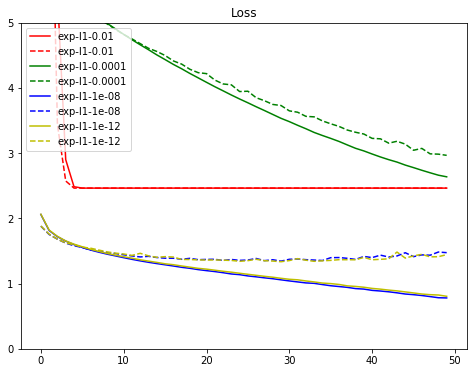

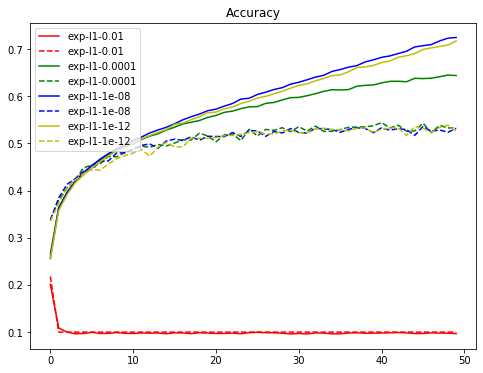

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])),results[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_loss'])),results[cond]['valid_loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])),results[cond]['train_acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_acc'])),results[cond]['valid_acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()